# Segmentation

## Import Images

In [1]:
#-----------------------------------------------------------------
# imports
#-----------------------------------------------------------------
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import os
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from segmentation.utils import num_index


2023-02-27 17:28:29.466327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 17:28:29.619151: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-27 17:28:29.622827: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ansary/anaconda3/envs/rezwan/lib/python3.8/site-packages/cv2/../../lib64:
202

In [2]:
'''
Path: Select the dataset path
'''
path = './dataset/'

In [3]:
'''
Initialize the arrays for Benign and Malignant tumors, both real and mask. 
As already we know the number of samples from dataset in benign & malignant 109 & 123, respectively.
'''

X_b, y_b = np.zeros((109, 128, 128, 1)), np.zeros((109, 128, 128, 1))
X_m, y_m = np.zeros((123, 128, 128, 1)), np.zeros((123, 128, 128, 1))

In [4]:
"""
Load all images and mask, and label these w.r.t their number
"""

for i, tumor_type in enumerate(os.listdir(path)) :
    for image in os.listdir(path+tumor_type+'/') :
        p = os.path.join(path+tumor_type, image)
        # read image as  grayscale
        img = cv2.imread(p,cv2.IMREAD_GRAYSCALE)           

        num_split, image_type, image_mask_split = num_index(image)

        # If image is real add it to X as benign, malignant.
        if image_type == "Benign" and image_mask_split == "Image":
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray(img)
            X_b[num_split-1]+= img_to_array(pil_img)

        elif image_type == "Malignant" and image_mask_split == "Image":
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray(img)
            X_m[num_split-1]+= img_to_array(pil_img)

        # Similarly add the target mask to y.
        elif image_type == "Benign" and image_mask_split == "Mask":
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray(img)
            y_b[num_split-1]+= img_to_array(pil_img)

        elif image_type == "Malignant" and image_mask_split == "Mask":
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray(img)
            y_m[num_split-1]+= img_to_array(pil_img)


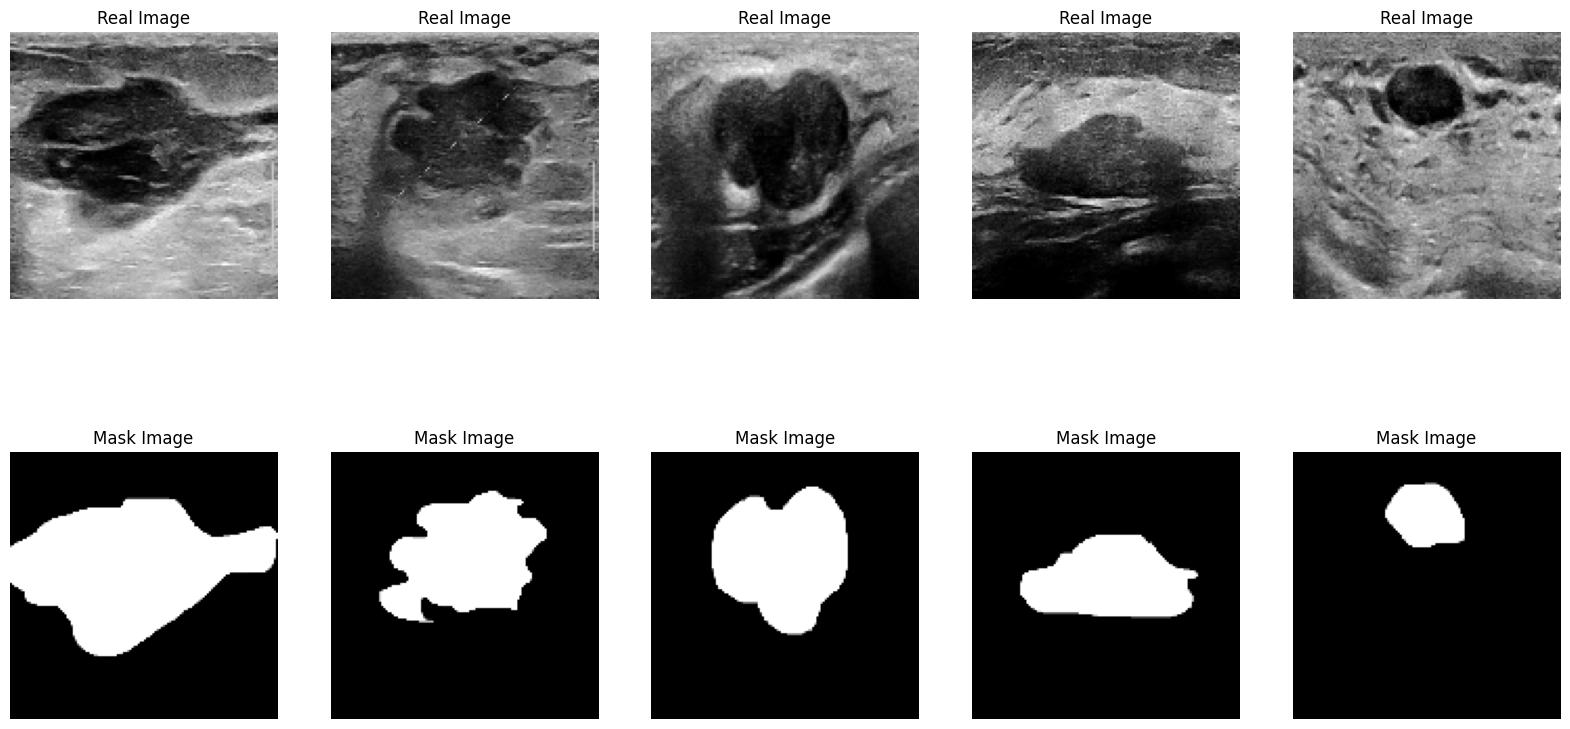

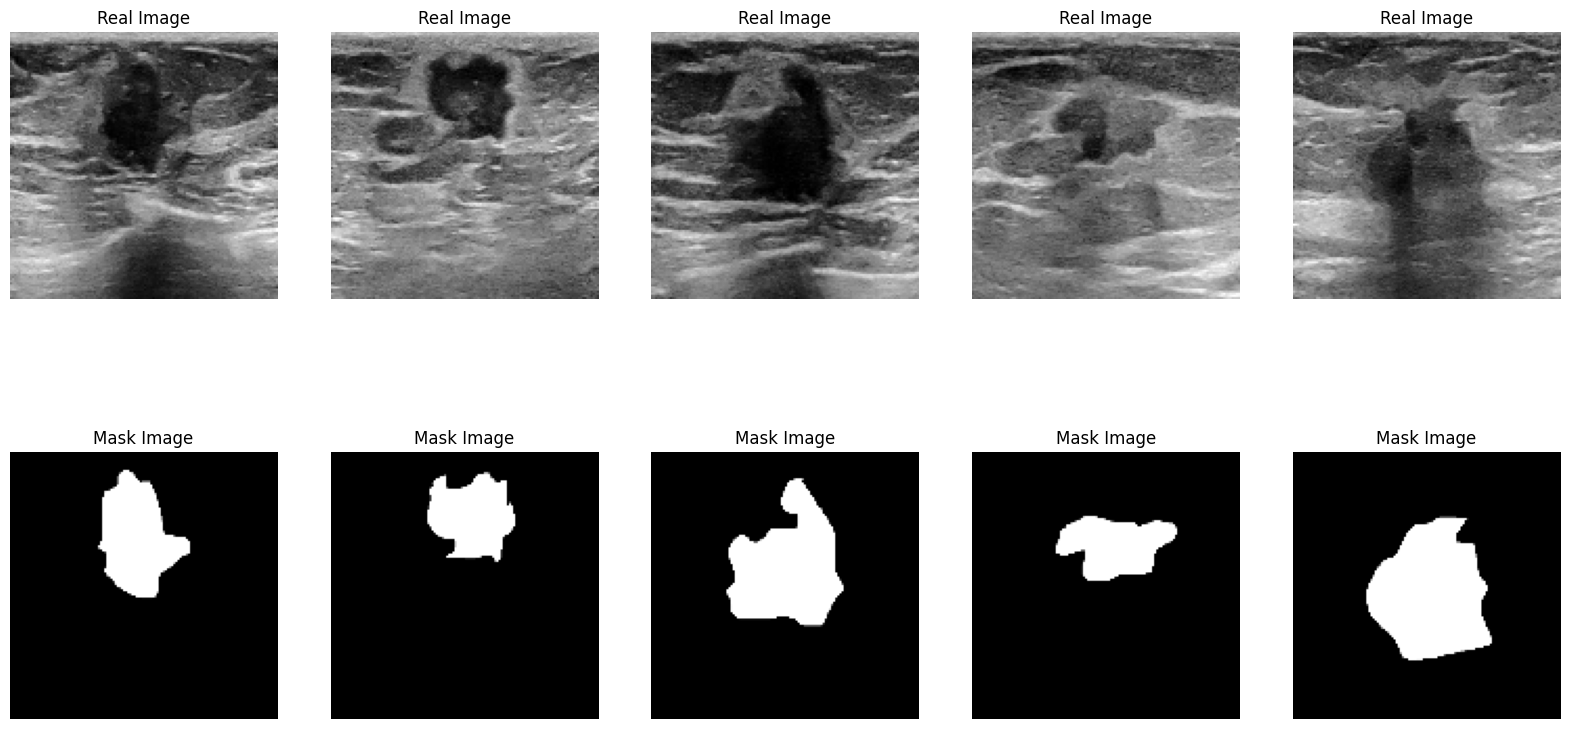

In [5]:
'''
* Visualize the results to verify the above method
'''

# For Benign
plt.figure(figsize = (20,10))
for i in range(5) :
    plt.subplot(2,5,i+1)
    plt.imshow(X_b[i+1], 'gray')
    plt.title('Real Image')
    plt.axis('off')

for i in range(5) :
    plt.subplot(2,5,i+6)
    plt.imshow(y_b[i+1], 'gray')
    plt.title('Mask Image')
    plt.axis('off')
plt.show()

# For Malignant
plt.figure(figsize = (20,10))
for i in range(5) :
    plt.subplot(2,5,i+1)
    plt.imshow(X_m[i+1], 'gray')
    plt.title('Real Image')
    plt.axis('off')

for i in range(5) :
    plt.subplot(2,5,i+6)
    plt.imshow(y_m[i+1], 'gray')
    plt.title('Mask Image')
    plt.axis('off')
plt.show()

## Create datasets & Split train-test for model training and validation

In [6]:
X = np.concatenate((X_b, X_m), axis = 0)
y = np.concatenate((y_b, y_m), axis = 0)

X /= 255.0
y /= 255.0

print(X.shape)
print(y.shape)

print(10*"--")

print(X.max())
print(X.min())

(232, 128, 128, 1)
(232, 128, 128, 1)
--------------------
1.0
0.0


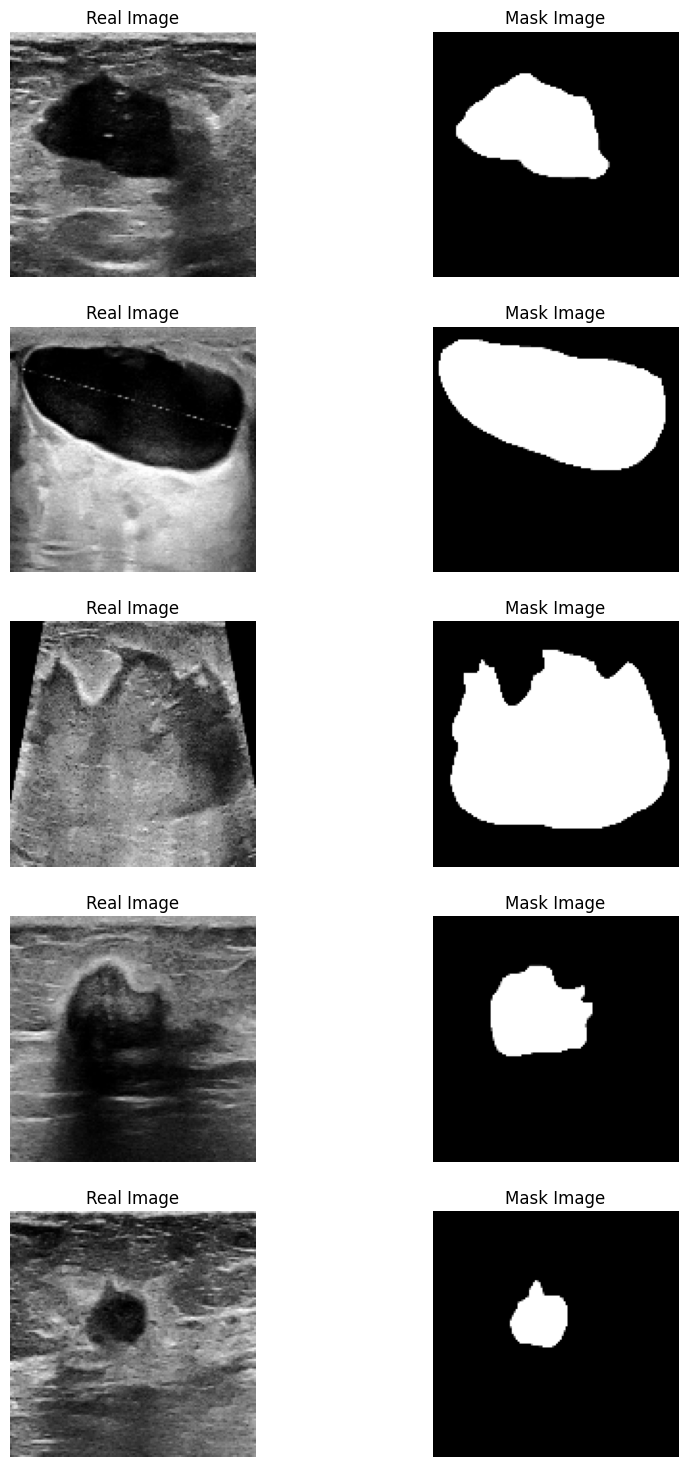

In [7]:
'''
Visualization
'''

plt.figure(figsize = (10,30))
i = 0
while i < 9 :
    
    x = np.random.randint(0,232)
    
    plt.subplot(8,2,i+1)
    plt.imshow(X[x],'gray')
    plt.title('Real Image')
    plt.axis('off')
    
    plt.subplot(8,2,i+2)
    plt.imshow(y[x],'gray')
    plt.title('Mask Image')
    plt.axis('off')
    
    i += 2
plt.show()

In [8]:
'''
Train test split
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1)

print(X_train.shape)
print(y_train.shape)

print(10*"--")

print(X_test.shape)
print(y_test.shape)

(220, 128, 128, 1)
(220, 128, 128, 1)
--------------------
(12, 128, 128, 1)
(12, 128, 128, 1)


2023-02-27 17:28:34.718426: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ansary/anaconda3/envs/rezwan/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-27 17:28:34.718511: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ansary/anaconda3/envs/rezwan/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-27 17:28:34.718549: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ansary/anaconda3/envs/rezwan/lib/python3.8/site-package

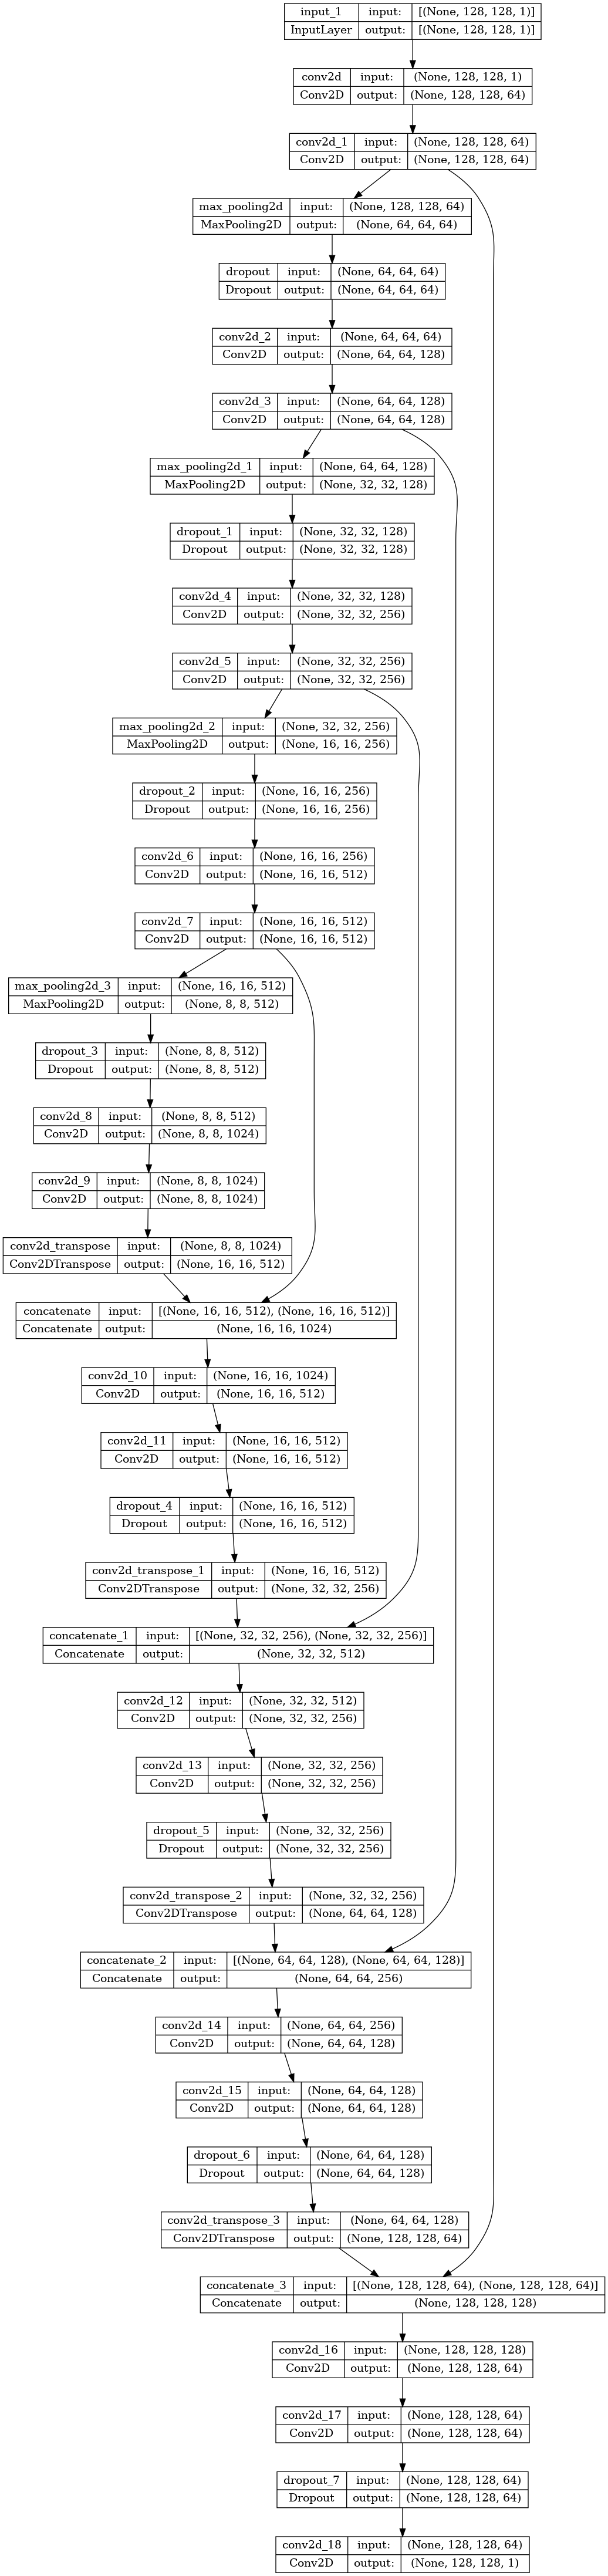

In [9]:
## import U-net model

from segmentation.model_creation import u_net
model = u_net()

# plot model structure
keras.utils.plot_model(model, './outputs/u_net_model_plot.png', show_shapes = True)


In [10]:
'''
# Loss function

- The loss for evaluating the performance of model in semantic segmentation will be IoU (Intersection over Union).
- It is the ratio of intersection of pixels between predicted and target image over their union.
- The MeanIoU() method in tf.keras.metrics package can be used.

'''

'''
# Training
- Adam gradient descent was used with a small learning rate of 0.00005. 
'''


from keras.metrics import MeanIoU
import tensorflow as tf

model.compile(loss = 'mean_squared_error', metrics = ['accuracy'], optimizer = keras.optimizers.Adam(learning_rate = 0.00005))
print(model.summary())


Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [11]:
from keras.callbacks import ModelCheckpoint
b_size = 32
epochs_num = 200 
checkp = ModelCheckpoint('./outputs/u_net_model.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)
history = model.fit(X_train, y_train, epochs = epochs_num, batch_size = b_size, validation_data = (X_test, y_test), callbacks = [checkp])


Epoch 1/200
7/7 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.8434
Epoch 1: val_accuracy improved from -inf to 0.85109, saving model to ./outputs/u_net_model.h5
7/7 [==============================] - 58s 8s/step - loss: 0.1537 - accuracy: 0.8434 - val_loss: 0.1437 - val_accuracy: 0.8511
Epoch 2/200
7/7 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.8434
Epoch 2: val_accuracy did not improve from 0.85109
7/7 [==============================] - 43s 6s/step - loss: 0.1499 - accuracy: 0.8434 - val_loss: 0.1394 - val_accuracy: 0.8511
Epoch 3/200
7/7 [==============================] - ETA: 0s - loss: 0.1454 - accuracy: 0.8434
Epoch 3: val_accuracy did not improve from 0.85109
7/7 [==============================] - 42s 6s/step - loss: 0.1454 - accuracy: 0.8434 - val_loss: 0.1342 - val_accuracy: 0.8511
Epoch 4/200
7/7 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.8434
Epoch 4: val_accuracy did not improve from 0.85109


Text(0.5, 1.0, 'Losses vs Epochs')

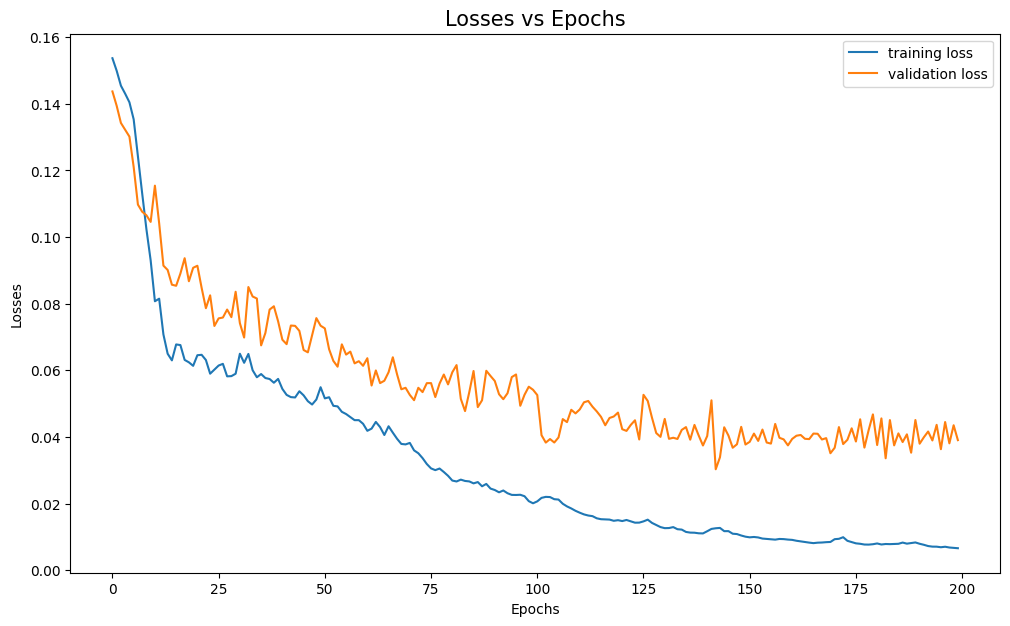

In [12]:
## Model Performance
plt.figure(figsize = (12,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs', fontsize = 15)

In [13]:
## load trained-model
from keras.models import load_model
model = load_model('./outputs/u_net_model.h5')

y_pred = model.predict(X_test)

print(y_pred.shape)

1/1 [==============================] - 1s 1s/step
(12, 128, 128, 1)


In [14]:
## test score
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'] )

score, acc = model.evaluate(X_test, y_test,batch_size=32)

print('Test score:', score)
print('Test accuracy:', acc)

1/1 [==============================] - 1s 1s/step - loss: 0.2284 - accuracy: 0.9612
Test score: 0.22836406528949738
Test accuracy: 0.9611918330192566


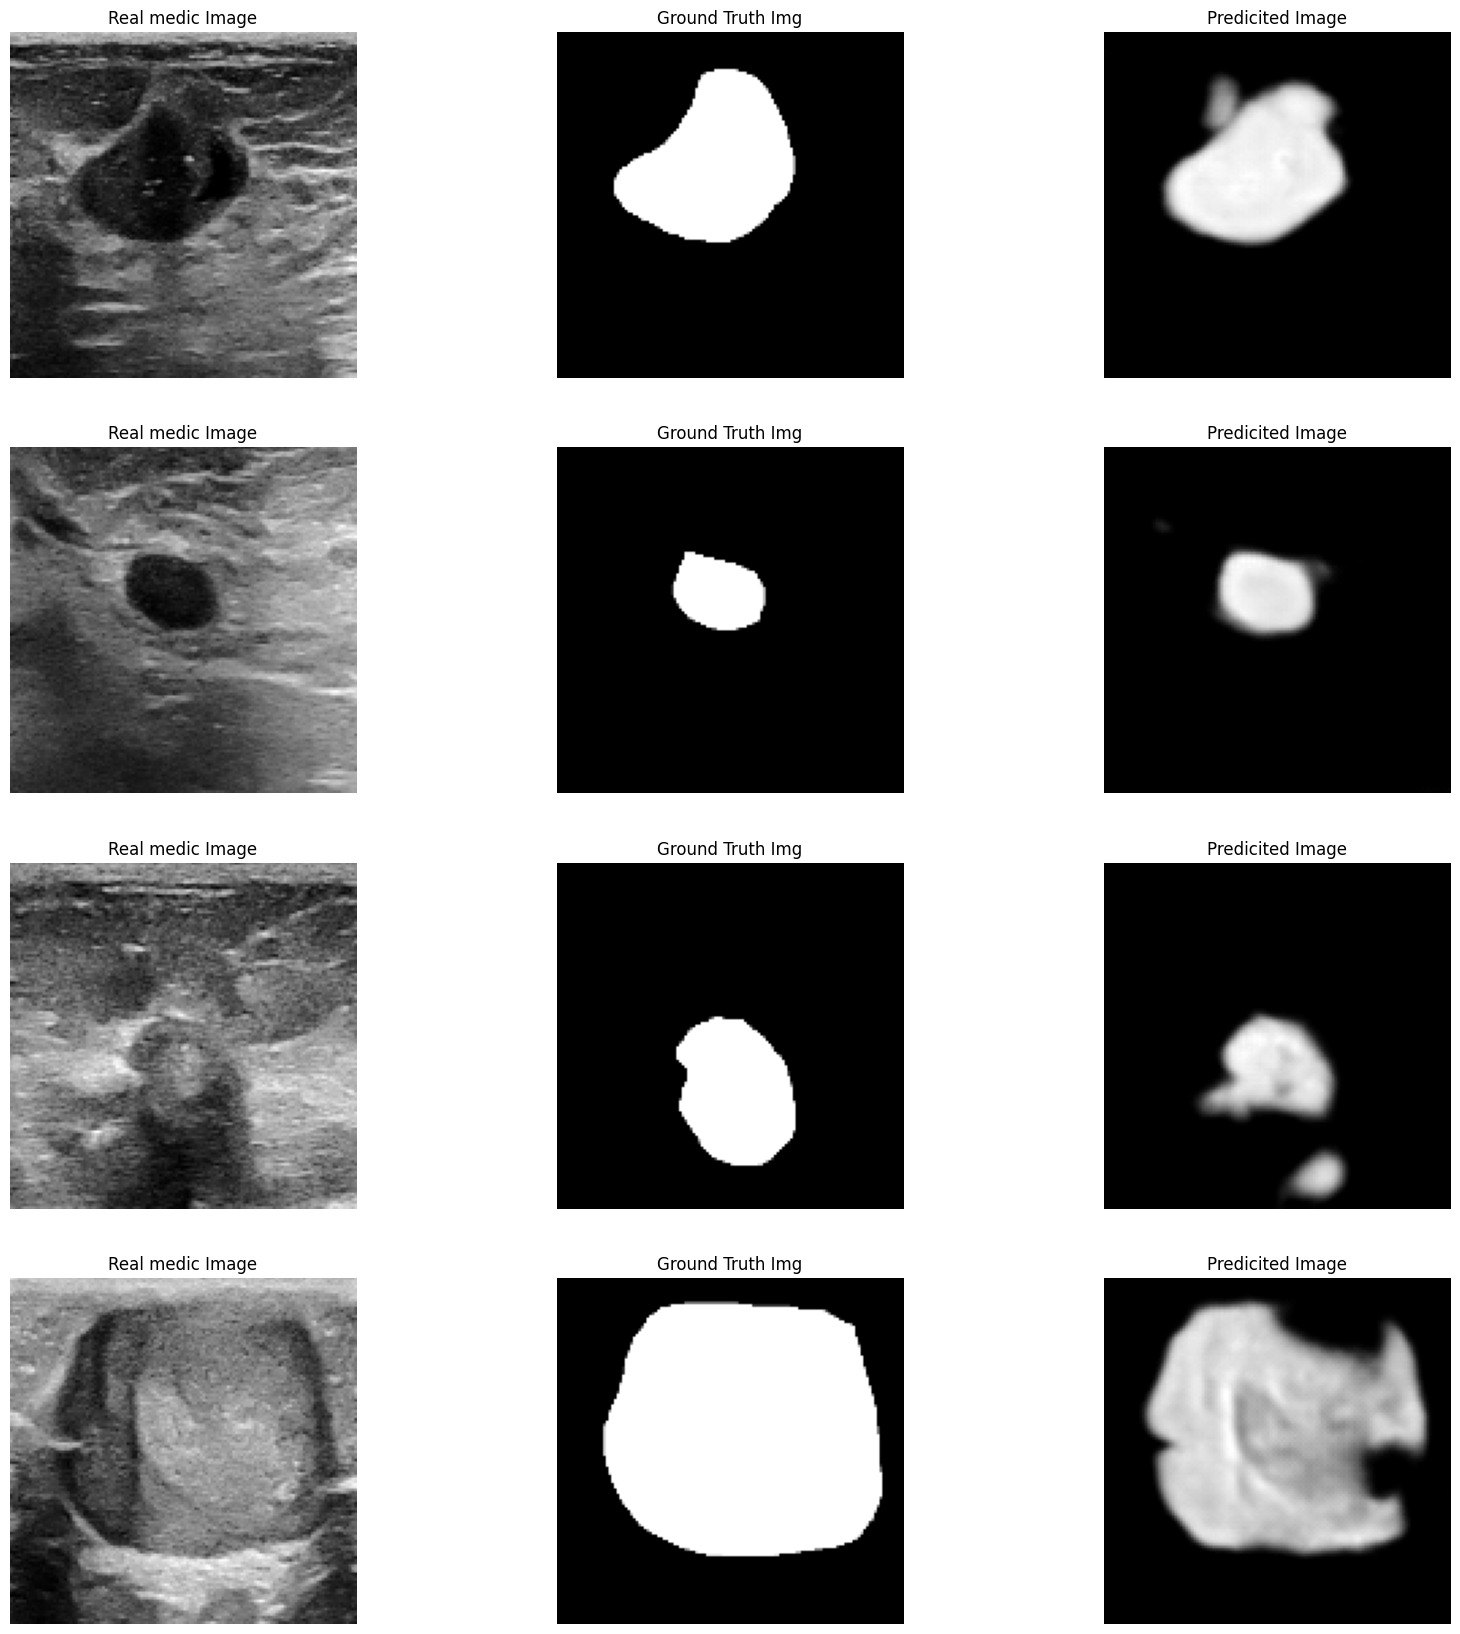

In [15]:
## Prediction images

plt.figure(figsize = (20,80))

i = 0
x = 0
while i < 12 :
    
    plt.subplot(15,3,i+1)
    plt.imshow(X_test[x], 'gray')
    plt.title('Real medic Image')
    plt.axis('off')
    
    plt.subplot(15,3,i+2)
    plt.imshow(y_test[x], 'gray')
    plt.title('Ground Truth Img')
    plt.axis('off')
    
    plt.subplot(15,3,i+3)
    plt.imshow(y_pred[x], 'gray')
    plt.title('Predicited Image')
    plt.axis('off')
    
    x += 1
    i += 3
plt.show()

# Classiification

In [16]:
info = [
    'Benign',       # 0
    'Malignant',    # 1
]

path = './dataset/'

In [17]:
X = []
y = []

label_num = -1

for label_class in os.listdir(path) :
    new_path   = path + label_class
    label_num += 1
    
    for img in os.listdir(new_path) :
        if 'Mask' not in img and 'Lesion' not in img:
            # print(img)     
            y.append(label_num)
            x = cv2.imread(path + label_class + '/' + img, cv2.IMREAD_GRAYSCALE)
            X.append(img_to_array(Image.fromarray(cv2.resize(x, (128,128)))))

In [18]:
from tensorflow.keras.utils import to_categorical
X = np.array(X)
y = np.array(y)
X/= 255.0

y = to_categorical(y) ## Category

print(X.shape)
print(y.shape)

print(10*"--")

print(X.min())
print(X.max())

(232, 128, 128, 1)
(232, 2)
--------------------
0.0
1.0


(-0.5, 127.5, 127.5, -0.5)

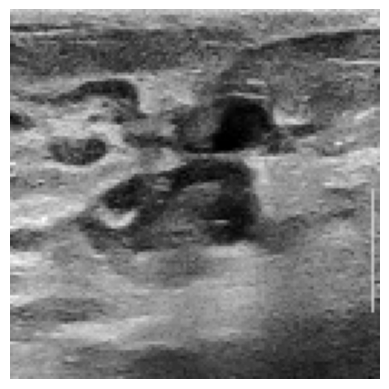

In [19]:
## sample visualize
plt.imshow(X[0], 'gray')
plt.axis('off')

8/8 [==============================] - 17s 2s/step
0.0
1.2750419


(-0.5, 127.5, 127.5, -0.5)

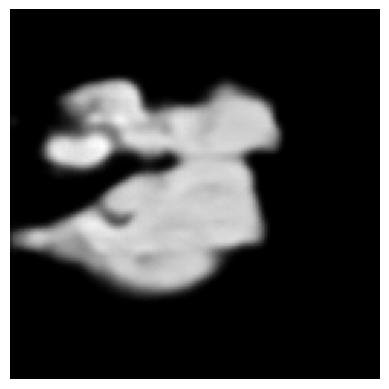

In [39]:
## predict / localize all dataset from segmentation model
from keras.models import load_model
localize = load_model('./outputs/u_net_model.h5')
M = localize.predict(X)

print(M.min())
print(M.max())

plt.imshow(M[0], 'gray')
plt.axis('off')


Text(0.5, 1.0, 'Distribution of classes accross the entire dataset')

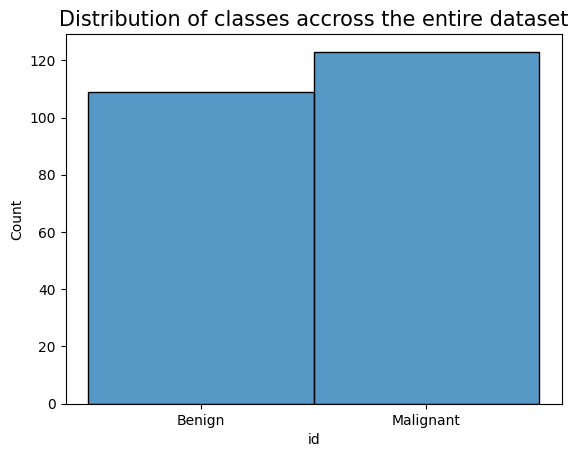

In [40]:
## Data distribution
import pandas
import seaborn

seaborn.histplot(data = pandas.DataFrame({'id' : [info[p] for p in np.argmax(y, axis = 1)]}), x = 'id')
plt.title('Distribution of classes accross the entire dataset', fontsize = 15)

In [41]:
## train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(M, y, test_size = 0.1, shuffle = True, random_state = 1)
print(X_train.shape)
print(y_train.shape)

print(10*"--")

print(X_test.shape)
print(y_test.shape)

(208, 128, 128, 1)
(208, 2)
--------------------
(24, 128, 128, 1)
(24, 2)


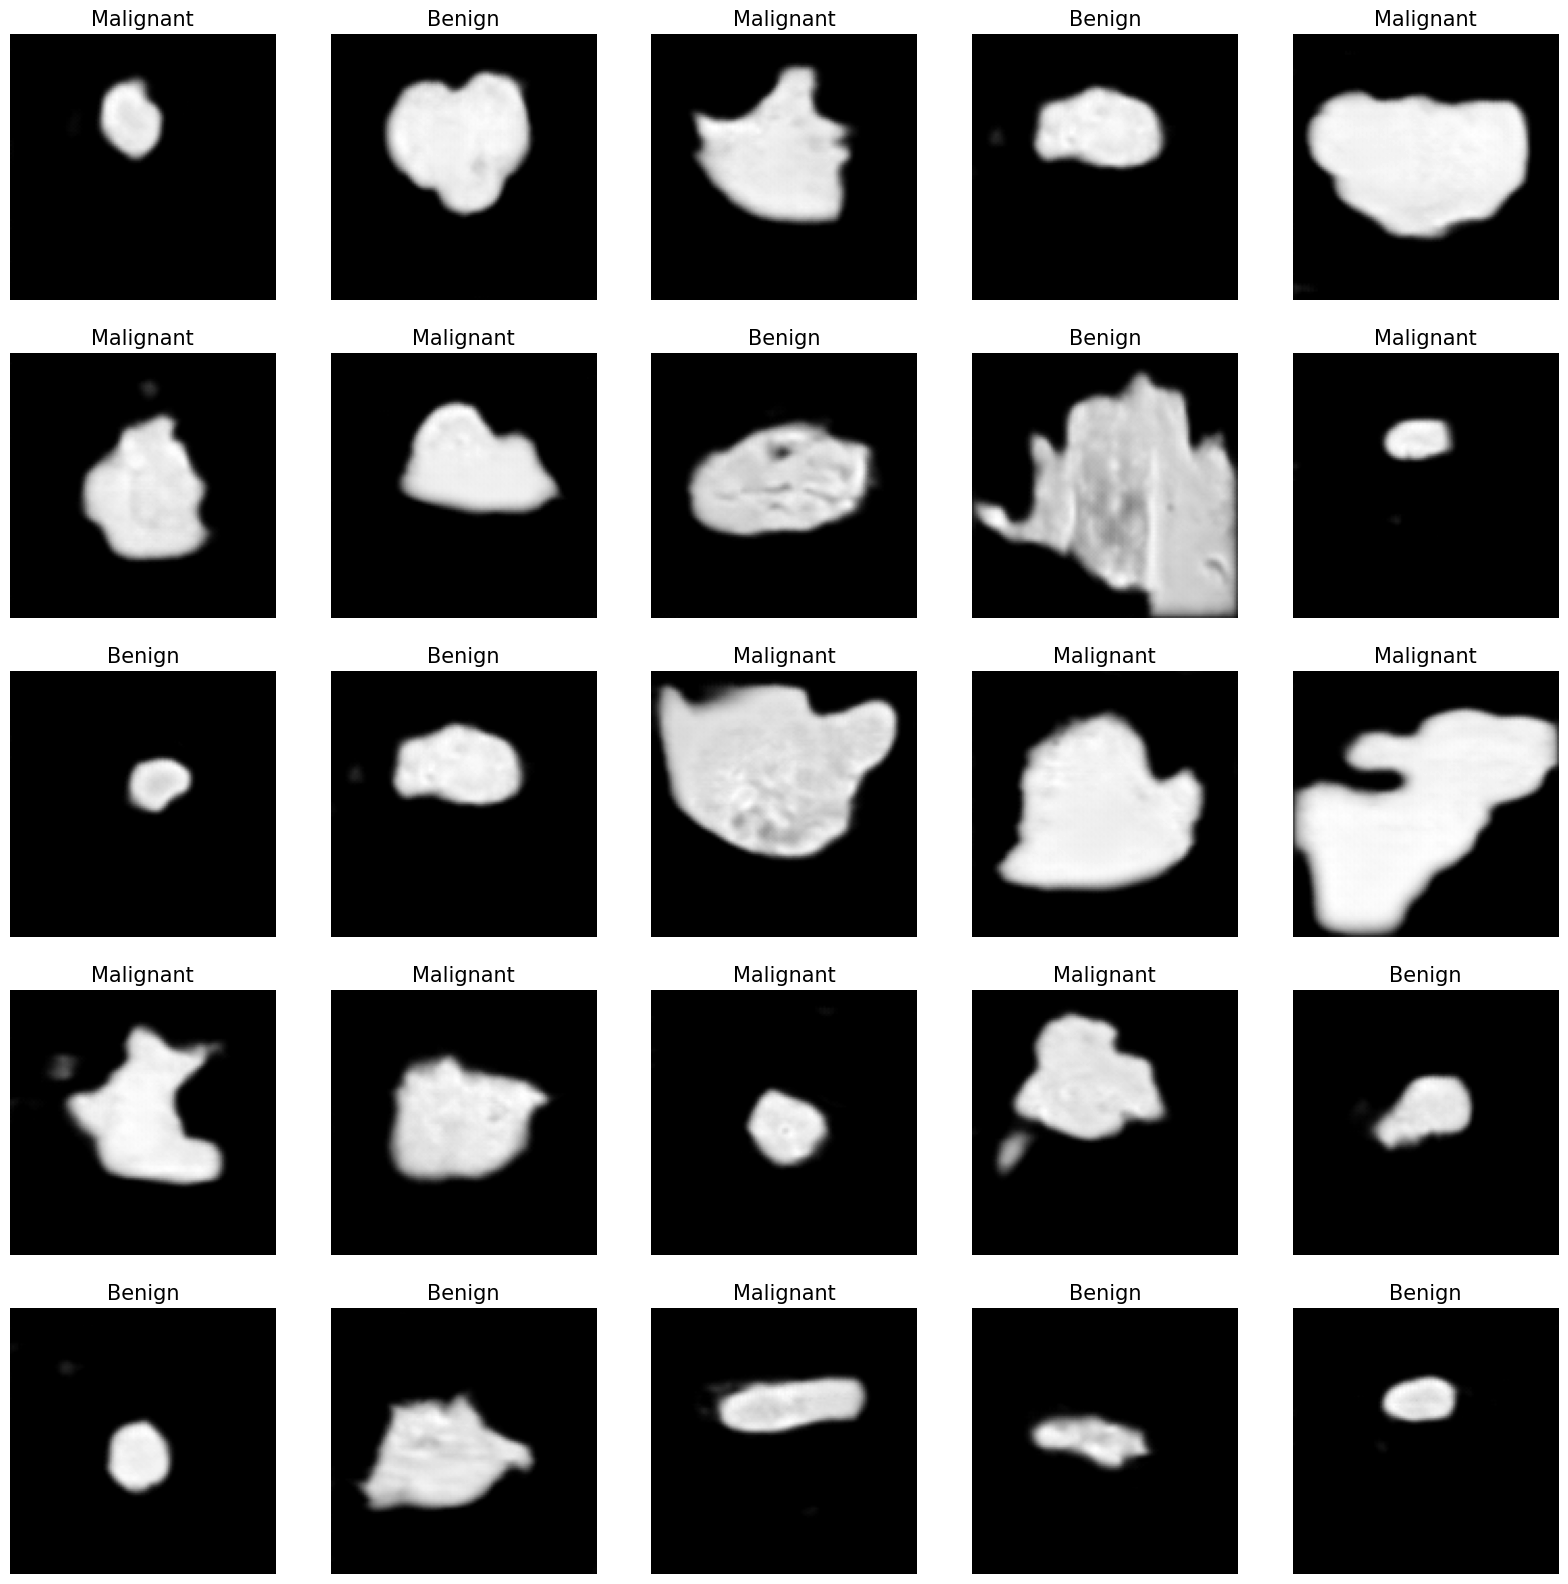

In [42]:
### visualize some images randomly

from numpy.random import randint
plt.figure(figsize = (20,20))
i = 0
SIZE = 208
while i < 25 :
    
    x = randint(0, SIZE)
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[x], 'gray')
    plt.title(f'{info[np.argmax(y_train[x])]}', fontsize = 15)
    plt.axis('off')
    
    i += 1
plt.show()

In [43]:
## Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(horizontal_flip = True, rotation_range = 15,
                                            width_shift_range = [-10, 10], 
                                            height_shift_range = [-10, 10], 
                                            zoom_range = [0.80, 1.00])

train_gen.fit(X_train)
pointer = train_gen.flow(X_train, y_train)
trainX, trainy = pointer.next()


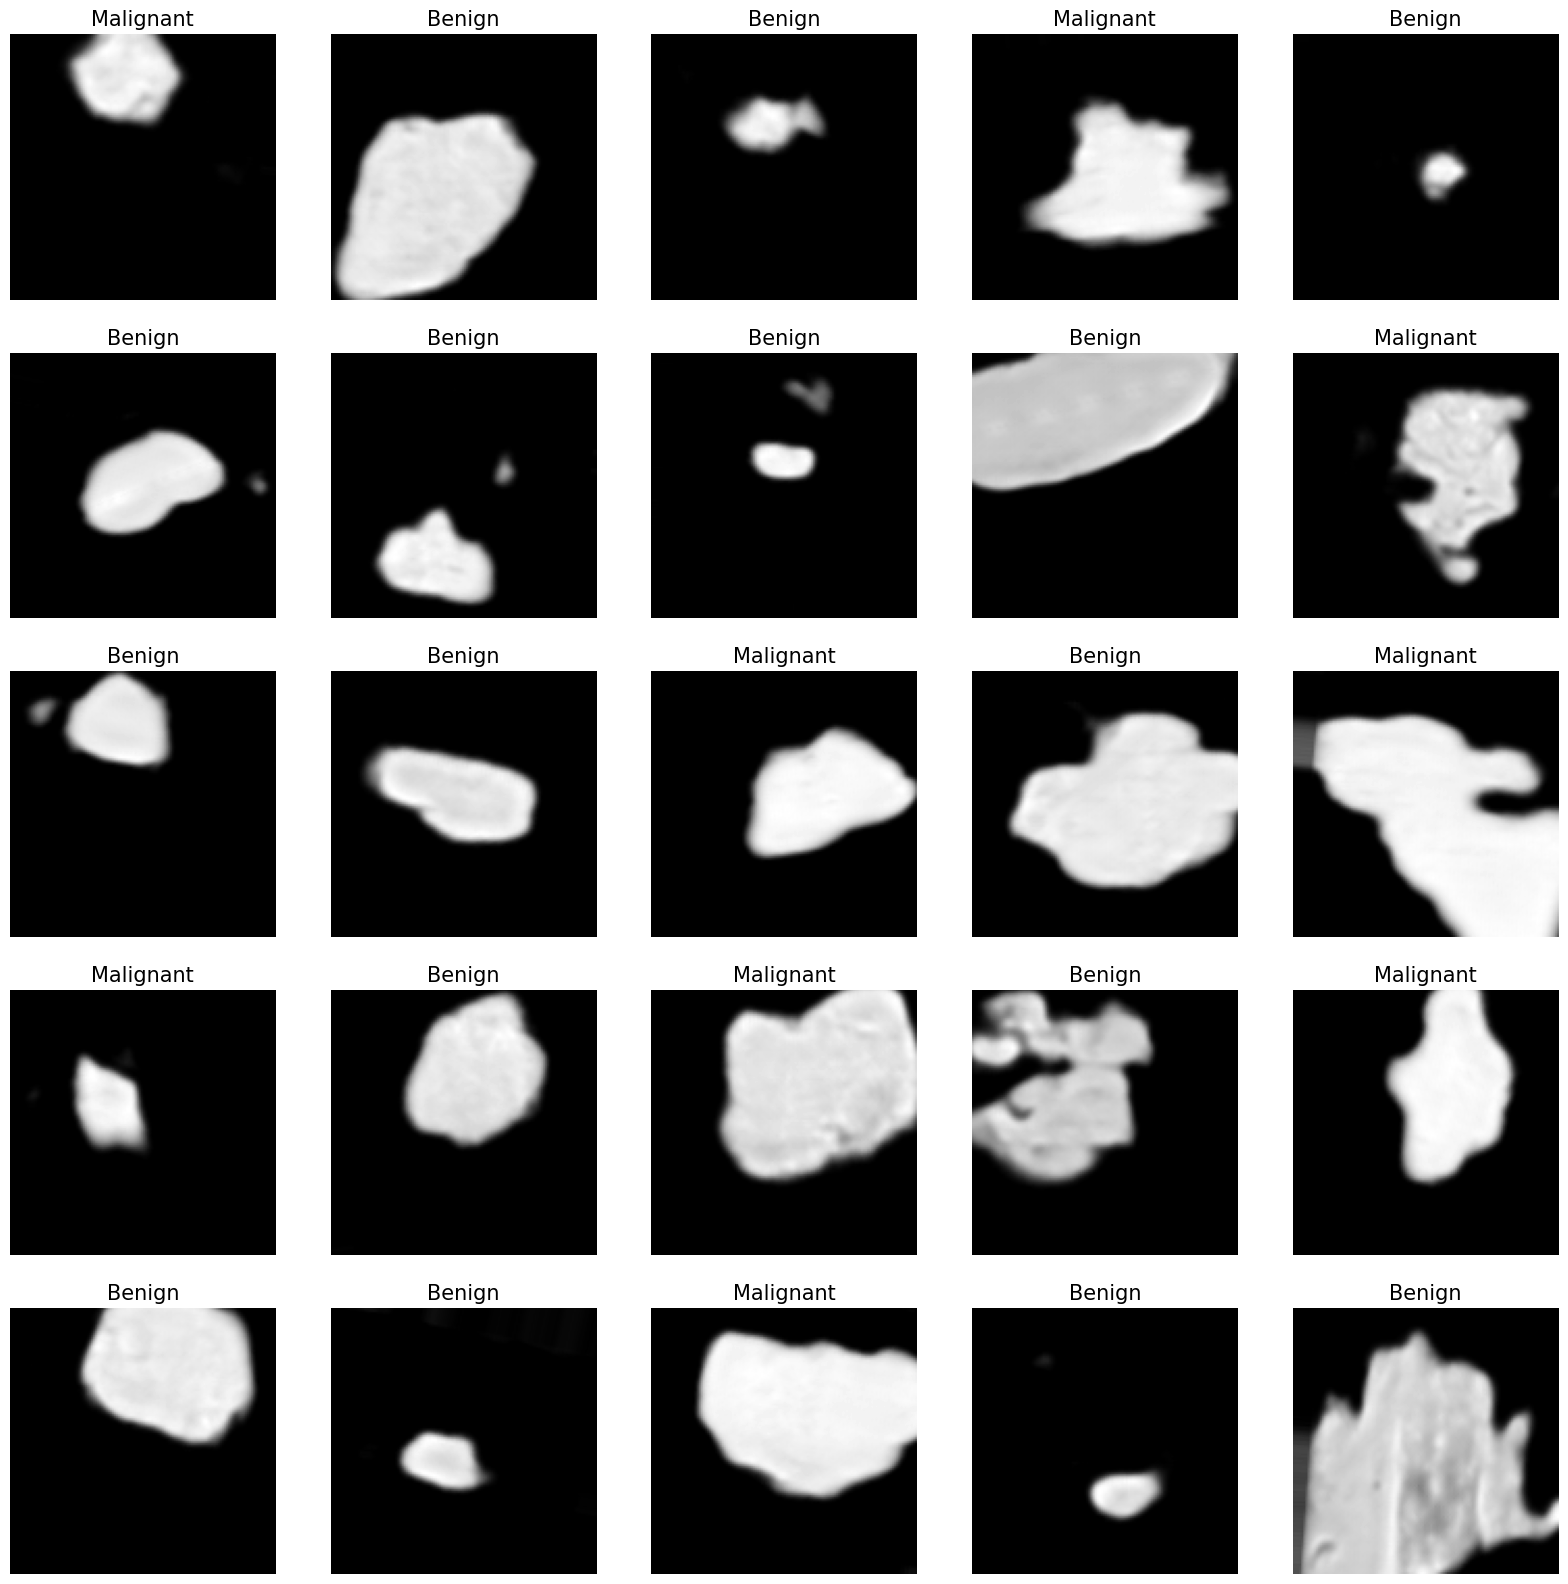

In [44]:
plt.figure(figsize = (20,20))

i = 0

while i < 25 :
    
    plt.subplot(5, 5, i+1)
    plt.imshow(trainX[i], 'gray')
    plt.title(f'{info[np.argmax(trainy[i])]}', fontsize = 15)
    plt.axis('off')
    
    i += 1
plt.show()

In [45]:
## import cnn model
from classification.cnn_model import CNN
class_nums = 2
model = CNN(32, 64, 128, 256, 32, class_nums)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 64, 64, 32)        448       
                                                                 
 sequential_13 (Sequential)  (None, 32, 32, 64)        18752     
                                                                 
 sequential_14 (Sequential)  (None, 16, 16, 128)       74368     
                                                                 
 sequential_15 (Sequential)  (None, 8, 8, 256)         296192    
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 sequential_16 (Sequential)  (None, 32)                524448    
                                                                 
 dense_5 (Dense)             (None, 2)               

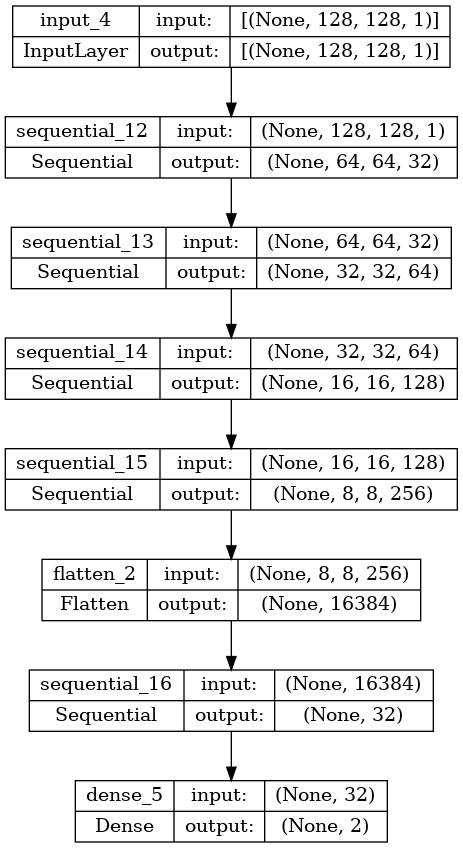

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model, './outputs/cnn_classification_model.png', show_shapes = True)

In [47]:
## fit
from keras.callbacks import ModelCheckpoint
b_size = 64
epoch_nums = 1000
checkp = ModelCheckpoint('./outputs/cnn_classifier.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)
history = model.fit(train_gen.flow(X_train, y_train, batch_size = b_size), epochs = epoch_nums, validation_data = (X_test, y_test), callbacks = [checkp])



Epoch 1/1000
4/4 [==============================] - ETA: 0s - loss: 4.5028 - accuracy: 0.5288
Epoch 1: val_accuracy improved from -inf to 0.54167, saving model to ./outputs/cnn_classifier.h5
4/4 [==============================] - 5s 702ms/step - loss: 4.5028 - accuracy: 0.5288 - val_loss: 4.3329 - val_accuracy: 0.5417
Epoch 2/1000
4/4 [==============================] - ETA: 0s - loss: 4.4455 - accuracy: 0.5577
Epoch 2: val_accuracy did not improve from 0.54167
4/4 [==============================] - 3s 620ms/step - loss: 4.4455 - accuracy: 0.5577 - val_loss: 4.3291 - val_accuracy: 0.5417
Epoch 3/1000
4/4 [==============================] - ETA: 0s - loss: 4.4486 - accuracy: 0.5529
Epoch 3: val_accuracy did not improve from 0.54167
4/4 [==============================] - 3s 614ms/step - loss: 4.4486 - accuracy: 0.5529 - val_loss: 4.3253 - val_accuracy: 0.5417
Epoch 4/1000
4/4 [==============================] - ETA: 0s - loss: 4.4727 - accuracy: 0.5529
Epoch 4: val_accuracy did not improve 

Text(0.5, 1.0, 'Loss val wrt. Epochs')

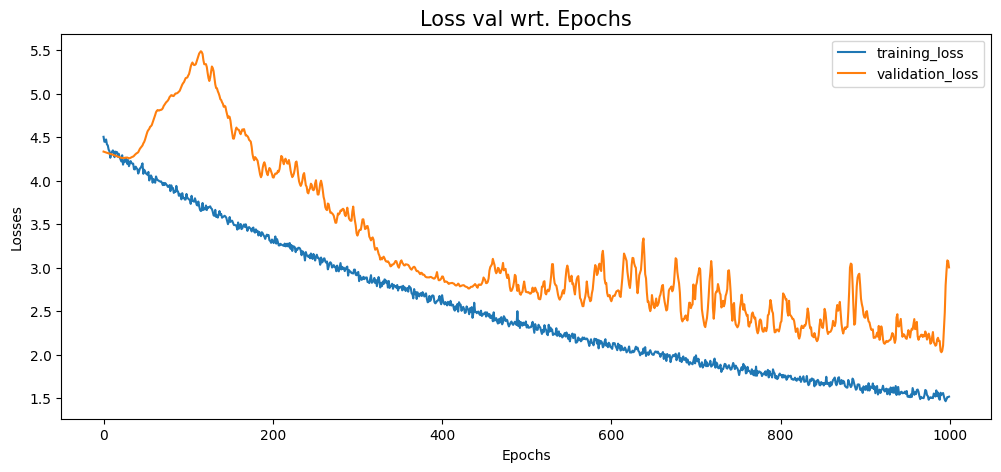

In [48]:
## performance visualization

plt.figure(figsize = (12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_loss', 'validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Loss val wrt. Epochs', fontsize = 15)

In [49]:
## Classification Prediction
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = keras.models.load_model('./outputs/cnn_classifier.h5')
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

1/1 [==============================] - 0s 186ms/step


In [50]:
## Show measurement indices values
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names = info))

Accuracy : 0.75
              precision    recall  f1-score   support

      Benign       0.68      1.00      0.81        13
   Malignant       1.00      0.45      0.62        11

    accuracy                           0.75        24
   macro avg       0.84      0.73      0.72        24
weighted avg       0.83      0.75      0.73        24



Text(0.5, 118.72222222222216, 'Predicted')

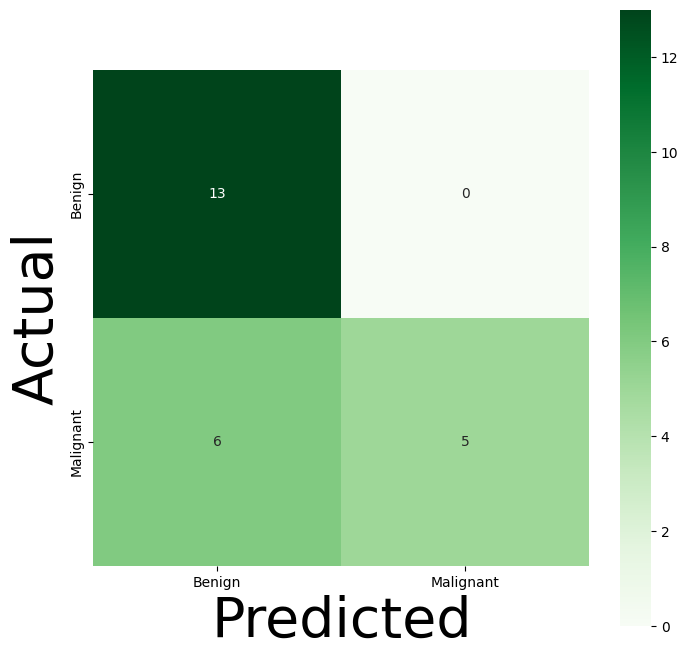

In [51]:
## Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,8))
ax = seaborn.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

## Brief Summary

(10, 128, 128, 1)
Minimum : 0.0
Maximum : 0.9960784316062927


(-0.5, 127.5, 127.5, -0.5)

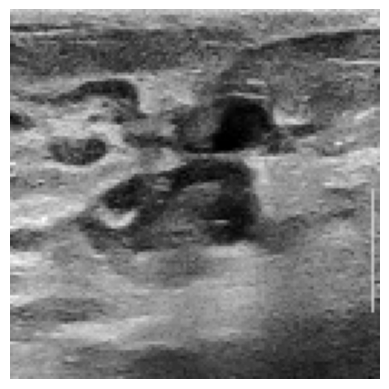

In [52]:
'''
The task is complete. 
First, we get mask from input shape then classify these into twe types, Benign & Malignant.
'''

image_path = [
    './dataset/Benign/1 Benign Image.bmp',
    './dataset/Benign/12 Benign Image.bmp',
    './dataset/Benign/32 Benign Image.bmp',
    './dataset/Benign/56 Benign Image.bmp',
    './dataset/Benign/77 Benign Image.bmp',
    './dataset/Malignant/1 Malignant Image.bmp',
    './dataset/Malignant/11 Malignant Image.bmp',
    './dataset/Malignant/22 Malignant Image.bmp',
    './dataset/Malignant/33 Malignant Image.bmp',
    './dataset/Malignant/44 Malignant Image.bmp',
]

## Load Models
from keras.models import load_model
classifier = load_model('./outputs/cnn_classifier.h5')
localize = load_model('./outputs/u_net_model.h5')

## Load images
testX = []
for img in image_path :
    testX.append(img_to_array(Image.fromarray(cv2.resize(cv2.imread(img, cv2.IMREAD_GRAYSCALE), (128,128)))))

testX = np.array(testX)
testX/= 255.0

print(testX.shape)
print(f'Minimum : {testX.min()}')
print(f'Maximum : {testX.max()}')

plt.imshow(testX[0], 'gray')
plt.axis('off')

1/1 [==============================] - 1s 977ms/step
(10, 128, 128, 1)
0.0
1.1067915


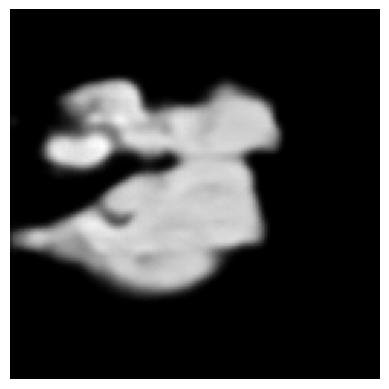

In [53]:
## predict mask

predY = localize.predict(testX)
print(predY.shape)
plt.imshow(predY[0], 'gray')
plt.axis('off')

print(predY.min())
print(predY.max())

1/1 [==============================] - 0s 154ms/step
[1 0 1 0 0 0 0 0 1 0]


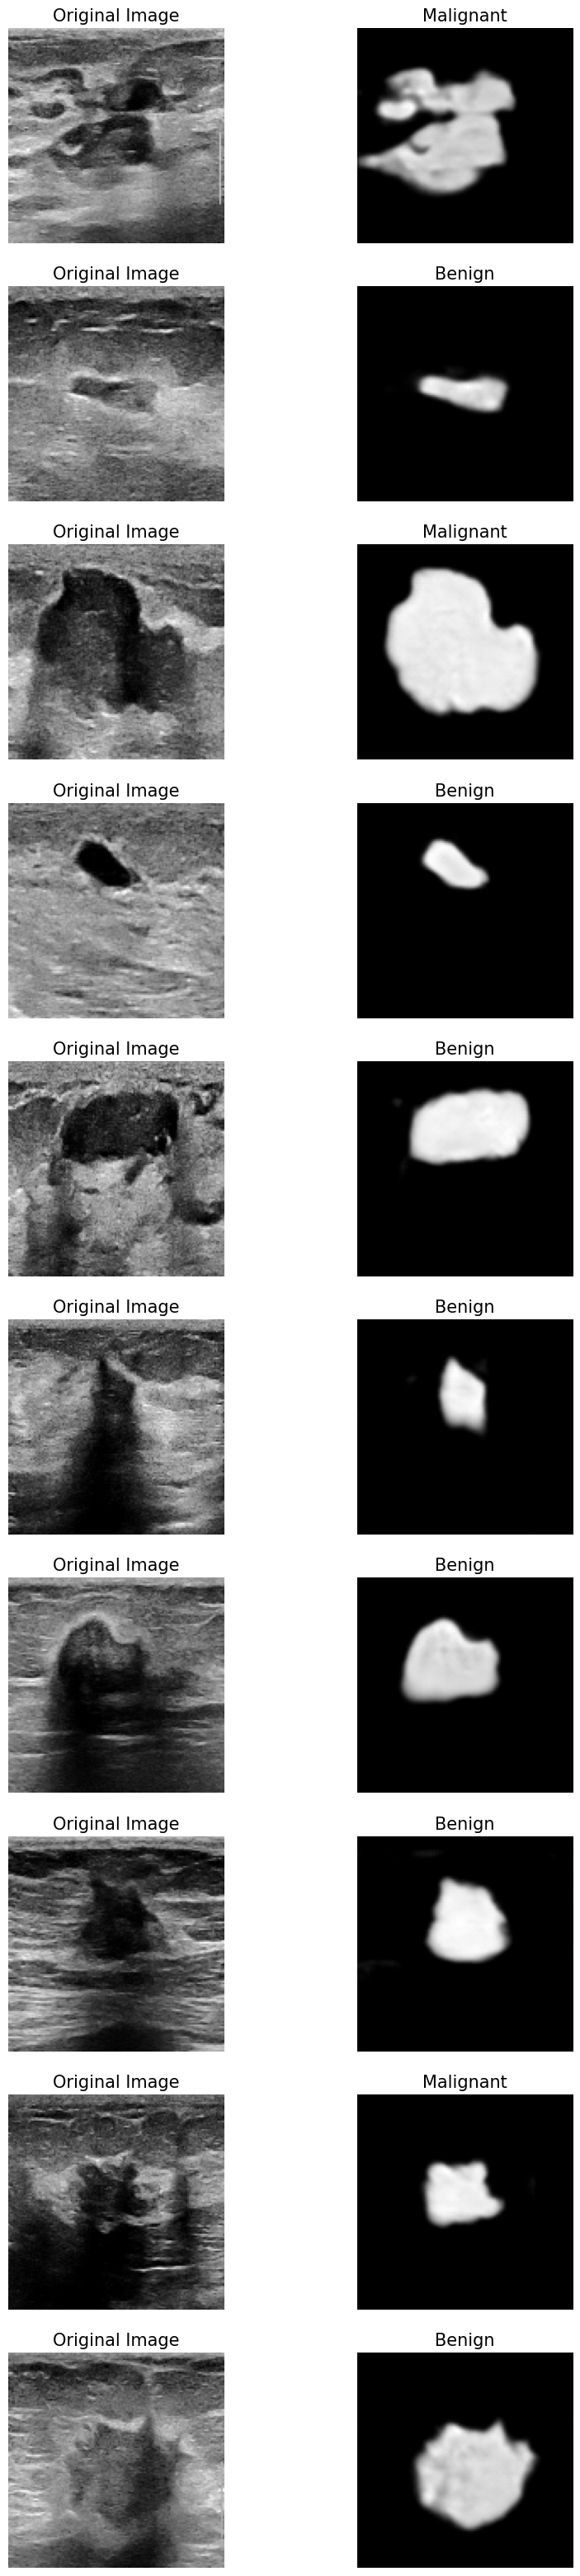

In [54]:
# predict the lebel, i.e., Benign or Malignant

pred_label = classifier.predict(predY)
print(np.argmax(pred_label, axis = 1))

plt.figure(figsize = (10,40))

i = 0
j = 0
while i < 20 :
    
    plt.subplot(10,2,i+1)
    plt.imshow (testX[j], 'gray')
    plt.title('Original Image', fontsize = 15)
    plt.axis('off')
    
    plt.subplot(10,2,i+2)
    plt.imshow (predY[j], 'gray')
    plt.title(f'{info[np.argmax(pred_label[j])]}', fontsize = 15)
    plt.axis('off')
    
    j += 1
    i += 2
plt.show()